# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Introduction

In 2020, amidst the challenging times of the Covid Pandemic, Tasty Bytes emerged as a beacon of inspiration by providing a search engine for recipes. This initiative aimed to assist people in making the most of their limited supplies at home. Over the past two years, Tasty Bytes has evolved into a fully-fledged business, offering a subscription-based service that curates personalized meal plans for individuals and families, ensuring a healthy and balanced diet tailored to diverse budgets. 

Currently, the Product Team approach handpicks a favorite recipe from a pool and features it on the homepage. Interestingly, some recipes have demonstrated the potential to spike overall website traffic by up to 40%. The Head of Data Science want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. By achieving these objectives, we aim to optimize recipe selection, enhance user engagement, and consequently drive higher subscription rates.

In this data science report, we delve into the data provided by Tasty Bytes' product manager, which includes information on each recipe and whether featuring it on the home page resulted in high traffic. This comprehensive data science report comprises a written summary of our analysis and findings, designed to be reviewed by the Head of Data Science. 

In addition to the written report, we have also prepared a presentation, which consists of 8-10 slides and is tailored for the product manager's understanding. The presentation adheres to a concise format, lasting no more than 10 minutes.

As we proceed, we will thoroughly detail the analysis methods employed, the key findings we discovered, and the various decision points taken during the process. Our ultimate goal is to present actionable insights that will enable Tasty Bytes to further enhance its service, enrich customer experiences, and continue to thrive as a leading player in the culinary industry.

# Data Validation

The dataset "recipe_site_traffic_2212.csv" was successfully loaded into a pandas DataFrame named 'df,' containing 947 rows and 8 columns. These columns include 'recipe,' 'calories,' 'carbohydrate,' 'sugar,' 'protein,' 'category,' 'servings,' and 'high_traffic.'

To ensure data quality and reliability for future analysis and machine learning, several data validation and cleaning steps were taken for each of the columns in the data frame.

In [23]:
# Import the pandas library
import pandas as pd

# Read the data from the CSV file "recipe_site_traffic_2212.csv" and store it as a DataFrame
df_preclean = pd.read_csv("recipe_site_traffic_2212.csv")

# Display the concise summary of the DataFrame
print(df_preclean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


### Nutritional Values (Calories, Carbohydrate, Sugar and Protein): 

For all this columns that should contain numerical values the data type is float, thus it was not necessary to do any data transformation. 

A total of 52 missing values were identified in the columns `calories`, `carbohydrate`, `sugar`, and `protein`. After confirming that these missing values corresponded to the same rows by visualising the distribution of missing values and considering they represent approximately 5% of the data, it was decided to drop rows with missing values in these columns. 

Dropping rows with missing values in these columns was deemed a more suitable approach than imputing with the mean or median value, due to the fact that values were missing in all four columns for the same rows. Imputing in this scenario could introduce biased or inaccurate values, as these rows would share the same four imputed data points, potentially distorting the overall distribution and analysis of the dataset.

It should be noted that an observation was made regarding the frequency of missing values in the 'high_traffic' column, which appeared to be comparatively lower in rows where the nutritional values were absent. As a result, a decision was taken to delve deeper into this pattern during the exploratory analysis phase.

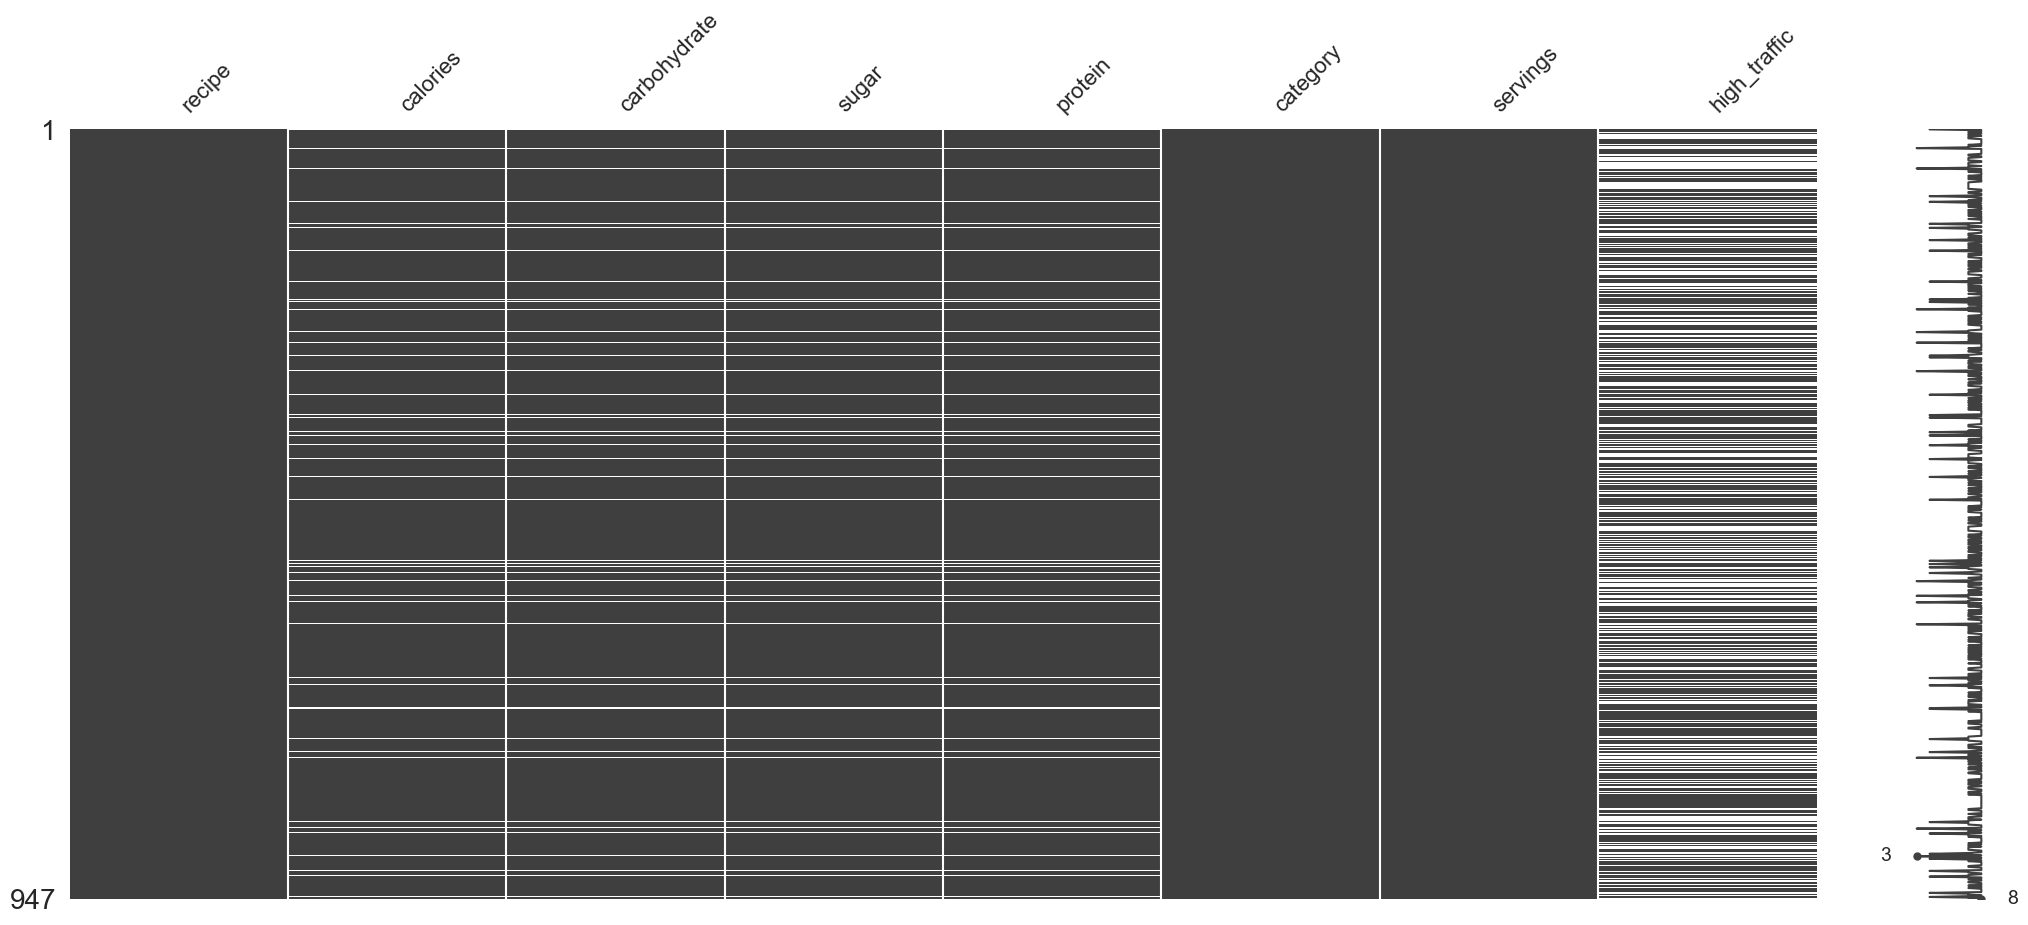

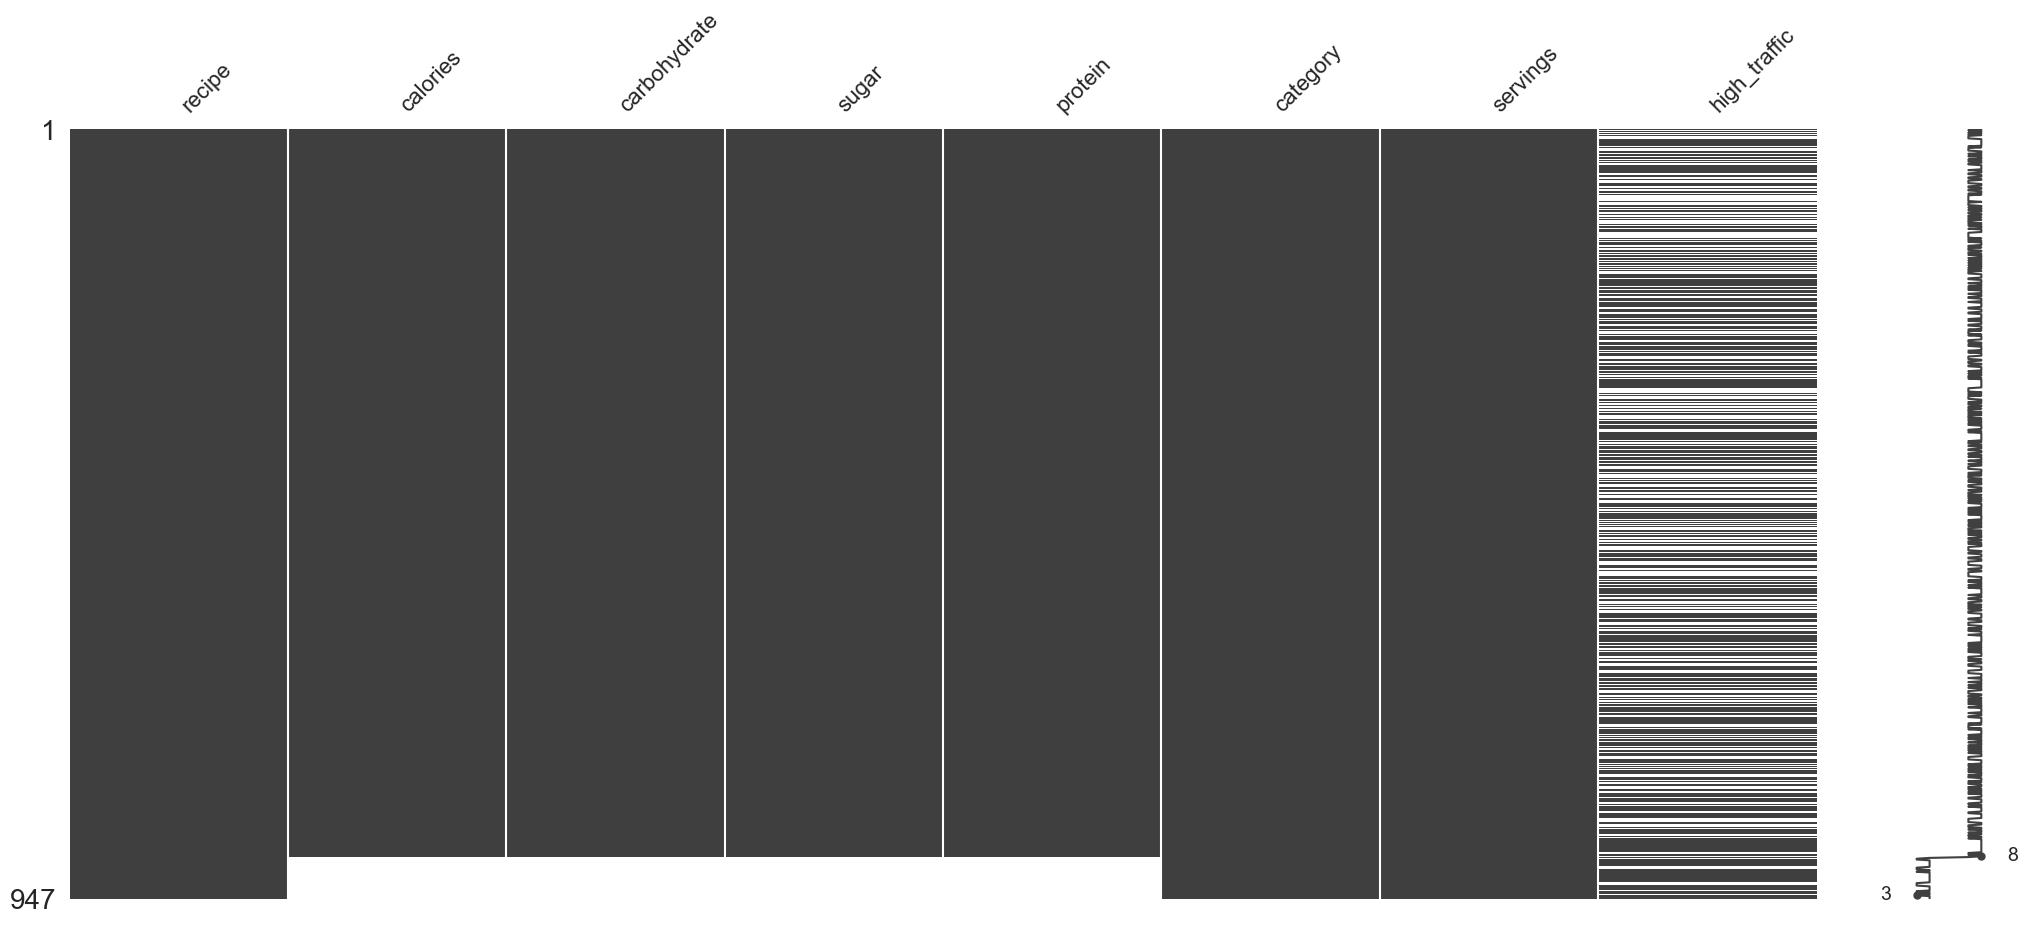

Percentage of missing values :5.4910242872228086%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB
None


In [24]:
# Import the necessary packages 
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Use missingno for visualizing missing values
msno.matrix(df_preclean)
msno.matrix(df_preclean.sort_values(by = "calories"))
plt.show()

# Display the count of missing values in each column for rows where 'calories' column is NaN in the original DataFrame 'df_preclean'
print("Percentage of missing values :" + str((df_preclean["calories"].isna().sum() / len(df_preclean)) * 100) + "%")

# Drop rows with missing nutritional values 
df = df_preclean.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
                        
# Display concise summary of the new DataFrame 'df' after removing rows with missing nutritional values
print(df.info())

To understand the numerical distribution of nutritional values (`calories`, `carbohydrate`, `sugar`, and `protein`) and look for possible outliers and negative values, a histogram was plotted for each column. Additionally, the describe method was used. The analysis revealed a clear right skew in the distribution in all columns that can be observed in the histogram plots. 

Additionally, when using the describe method, it was confirmed that no negative values were present across these columns. The observed difference between the median and mean values in all columns is likely attributed to the right skewness of the distributions, rather than being influenced by few specific outliers, which is further supported by the examination of maximum values.

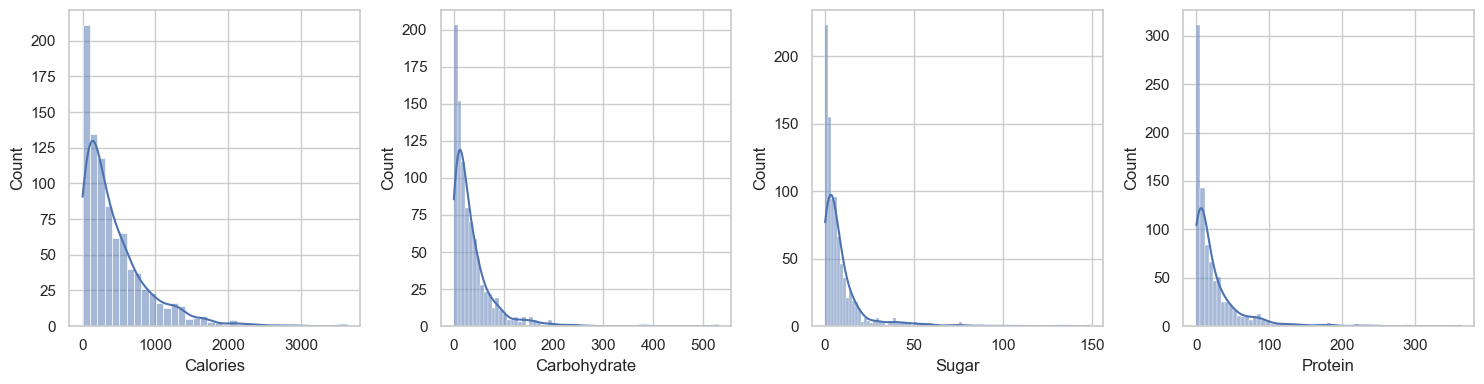

           recipe     calories  carbohydrate       sugar     protein
count  895.000000   895.000000    895.000000  895.000000  895.000000
mean   473.652514   435.939196     35.069676    9.046547   24.149296
std    272.763283   453.020997     43.949032   14.679176   36.369739
min      2.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    475.000000   288.550000     21.480000    4.550000   10.800000
75%    708.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


In [25]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Create a list with the nutritional values varibles to be plotted
nutritional_values = ["calories", "carbohydrate", "sugar", "protein"]

# Plot histograms for each numerical varible
for i, column in enumerate(nutritional_values):
    sns.histplot(data=df[column], ax=axes[i], kde=True)
    axes[i].set_xlabel(column.title())

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

# Display a summary of the numerical values to check for negative values or outliers
print(df.describe())

### Servings
Non-numerical strings were identified and removed from the `servings` column. The column was then transformed into a numerical data type to facilitate further analysis and to match the description details provided in the data information. 

In [26]:
# Display the count of different serving values in the 'servings' column
print(df["servings"].value_counts())

# Remove the string " as a snack" from the 'servings' column and convert it to integer type
df["servings"] = df["servings"].str.replace(" as a snack", "")
df["servings"] = df["servings"].astype("int8")


4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64


### High Traffic
The `high_traffic` column contains only the character "High" and missing values. Because of this, missing values in the `high_traffic` column were assumed to indicate low traffic. As a result, it was decided to replace "High" with the value 1 and missing values or NaN (low in this case) with the value 0. The data type of this column was set to integer. This transformation simplifies downstream analysis (specially in models such as logistic regression) and improves efficiency.

In [27]:
# Display the count of different values in the 'high_traffic' column, including missing values
print(df["high_traffic"].value_counts(dropna=False))

# Replace "High" with "1" and fill missing values with "0" in the 'high_traffic' column, then convert it to integer type
df["high_traffic"] = df["high_traffic"].str.replace("High", "1")
df["high_traffic"] = df["high_traffic"].fillna("0").astype("int8")

High    535
NaN     360
Name: high_traffic, dtype: int64


### Category:

The `category` column was checked for any duplicated or similar values and to confirm that the values were the ones described in the data information description. The data information sheet indicated the presence of 10 recipe categories. However, our analysis revealed the existence of 11 distinct categories since chicken was divided into "Chicken" and "Chicken Breast". In an effort to align with the specified categories in the information sheet, the values pertaining to "Chicken Breast" were harmonized by relabeling them as "Chicken".

Finally, the column was converted into a categorical data type due to its categorical nature and for optimized memory usage.

In [28]:
# Display the count of different serving values in the 'category' column
print(df["category"].value_counts())

# Replace the chicken breast category with only chicken
df["category"] = df["category"].str.replace("Chicken Breast", "Chicken")

# Transform the 'category' column into a category data type
df["category"] = df["category"].astype("category")

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64


### Recipe 
The `recipe` column was inspected as a possible indexing column. Since all values had a count of only 1, it was confirmed that the column only serves an indexing purpose. The `recipe` column was removed entirely from the DataFrame as it was deemed to have no value for the analysis.

In [29]:
# Display the count of recipes
print(df["recipe"].value_counts(sort=True))

# Drop the 'recipe' column from the DataFrame
df.drop("recipe", axis=1, inplace=True)

2      1
637    1
626    1
627    1
628    1
      ..
321    1
322    1
323    1
324    1
947    1
Name: recipe, Length: 895, dtype: int64


### Final steps and validation
After all the cleaning and modification of the dataframe and a final step of checking there were no duplicated rows, the index was reset to ensure that the index is sequential and to avoid any potential errors when accessing the data. 

The summary of the data types of all columns was displayed again to confirm the desired changes had been made correctly. By executing these data validation and cleaning steps, we have created a reliable and robust dataset, free from missing values and unnecessary features, setting the groundwork for meaningful analysis and effective machine learning models.

In [30]:
# Print out the number of duplicated rows in the data set
print(f"Number of duplicated rows: {df.duplicated().sum()}\n")

# Reset the index of the DataFrame after transformations
df.reset_index(drop=True, inplace=True)

# Check the updated DataFrame information
print(df.info())

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      895 non-null    float64 
 1   carbohydrate  895 non-null    float64 
 2   sugar         895 non-null    float64 
 3   protein       895 non-null    float64 
 4   category      895 non-null    category
 5   servings      895 non-null    int8    
 6   high_traffic  895 non-null    int8    
dtypes: category(1), float64(4), int8(2)
memory usage: 31.1 KB
None


# Exploratory analysis

## Single variable analysis 
### Exploring Servings Distribution with a pie chart
The exploratory analysis was started by examining the distribution of servings in a dataset. By calculating the occurrences of each unique value in the "servings" column, a pie chart was created to visualize the proportions of servings categories. 

The pie chart analysis revealed that serving values 6, 2, and 1 represented approximately 20% each of all the recipes. However, recipes designed for 4 servings stood out, constituting around 40% of the dataset, making them approximately twice as common as the other categories. This observation indicates a potential preference for recipes catering to four servings.

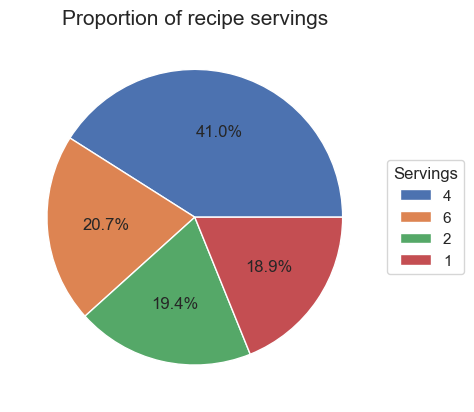

In [31]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the "servings" column
pie = df["servings"].value_counts()

# Get the unique labels from the "servings" column
labels = pie.index.tolist()

# Create and display a pie chart
fig, ax = plt.subplots()
ax.pie(pie, autopct='%1.1f%%')
ax.legend(labels, title="Servings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Proportion of recipe servings", fontsize=15)
plt.show()

### Exploring number of recipes by categories
The following analysis involved evaluating the distribution of recipes across different categories in the dataset. The outcomes were visualized through a bar plot. 

In our exploratory analysis of the categories in the dataset, we observed a varied distribution of recipe counts among the predefined categories. Notably, the 'Chicken' category stands out with a significantly higher count of 163 recipes, which is considerably higher than all other categories. This higher count could be related to the decision to combine 'Chicken Breast' and 'Chicken' into a single category.

Following 'Chicken,' the 'Breakfast' category comes next with 106 recipes. 'Beverages' and 'Potato' categories also exhibit notable representation, containing 92 and 83 recipes respectively.

Furthermore, 'Lunch/Snacks' and 'Vegetable' categories demonstrate a relatively similar count with 82 and 78 recipes respectively. 'Dessert' and 'Meat' categories each encompass around 77 and 74 recipes, while 'Pork' and 'One Dish Meal' wrap up the list with 73 and 67 recipes respectively.

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64


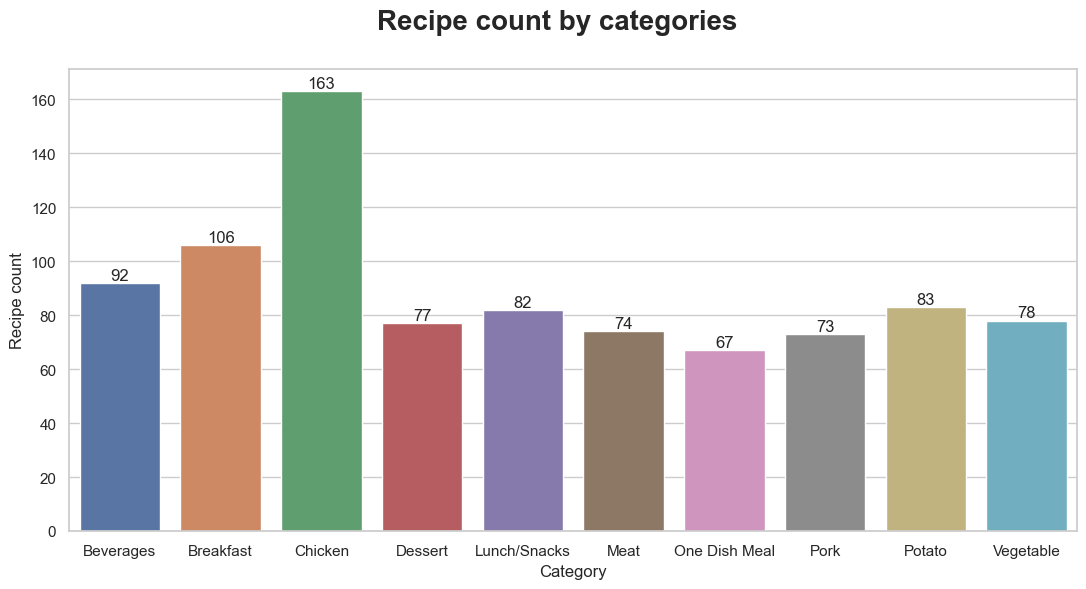

In [32]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(13, 6))

# Calculate category counts and rename columns
counts = df['category'].value_counts().rename_axis('category').reset_index(name='count')

# Create a bar plot
ax = sns.barplot(x='category', y='count', data=counts)

# Add labels to the bars with their counts
ax.bar_label(ax.containers[0])

print(df["category"].value_counts())

# Set labels for axis and a figure title and display the plot
ax.set_xlabel("Category")
ax.set_ylabel("Recipe count")
fig.suptitle("Recipe count by categories", fontsize=20, fontweight="bold")
plt.show()

## Multiple variable analysis
### Nutritional Value Distribution based on Traffic

In further exploratory data analysis, a figure with four subplots was plotted with the purpose to visualize the distribution of nutritional values (`calories`, `carbohydrate`, `sugar`, and `protein`) in relation to the `high_traffic` column. Each subplot represents a different nutritional value after its logarithmic transformation and comparing the distribution in the two categories of `high_traffic` - "Low Traffic" and "High Traffic."

Upon observing the violin plots, it was noted that even though there might be differences in the maximum values there seems to be no significant difference in the overall distribution of none of the nutritional values when considering high or low traffic. However, it is important to keep in mind that no formal statistical test was performed to validate this observation.

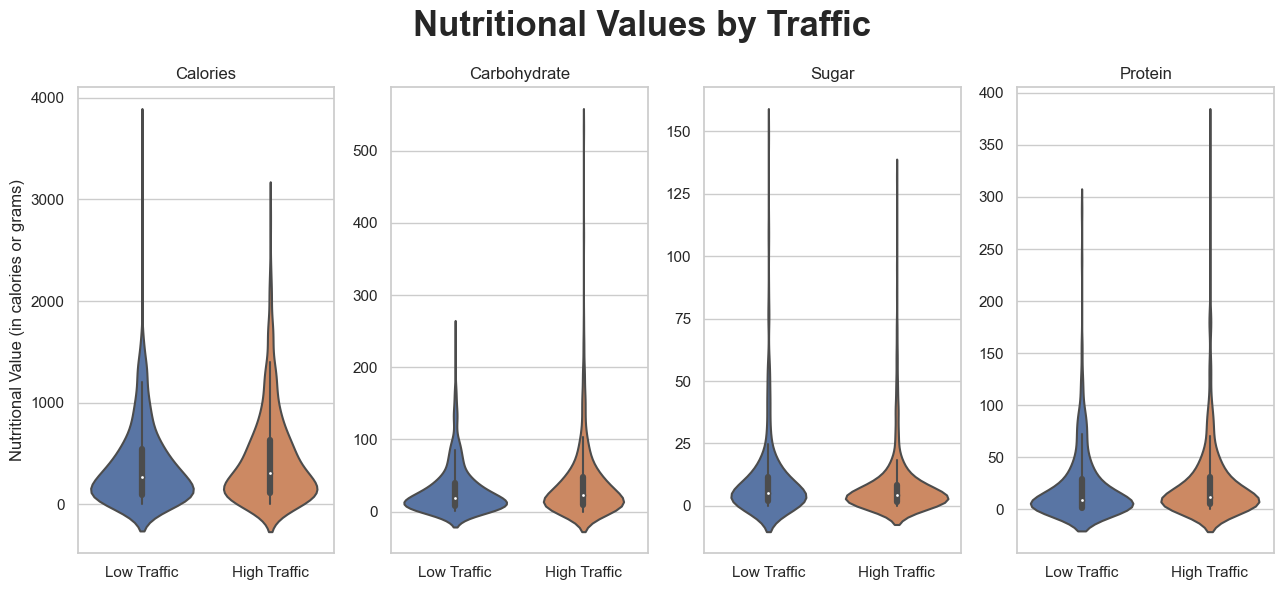

In [33]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(13, 6))  
    
# Plot histograms for each column in the DataFrame
for i, column in enumerate(nutritional_values):
    sns.violinplot(x="high_traffic", y=column, data=df, ax=axes[i])
    axes[i].set_title(column.title())
    axes[i].set_xticklabels(["Low Traffic", "High Traffic"])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

axes[0].set_ylabel("Nutritional Value (in calories or grams)")
fig.suptitle("Nutritional Values by Traffic", va="top", fontsize=25, fontweight="bold")
plt.tight_layout()
plt.show()

### Statistical Analysis of Missing Nutritional Values and High Traffic

During data cleaning and validation, an intriguing pattern related to missing nutritional values and their potential influence on higher traffic was observed. In order to investigate this further, a rigorous statistical test of proportions between distinct samples was conducted. The raw dataset that contained all the rows with missing values was used to generate both samples. The two formulated hypotheses for the statistical analysis were:

- **Null Hypothesis (H0)**: The proportion of high traffic recipes is consistent between recipes with and without missing nutritional values.
- **Alternative Hypothesis (Ha)**: The proportion of high traffic recipes is higher in recipes with missing nutritional values.

To validate our hypotheses, a one-sided Z-test for proportions, setting a significance level (alpha) of 0.05 was performed. The Z-test is an effective tool for comparing proportions between two groups and assessing if any observed differences are statistically significant.

Upon conducting the statistical analysis, a calculated p-value that was found to be below the set significance level (p < 0.05) was obtained. This result led to the rejection of the null hypothesis in favor of the alternative hypothesis. Consequently, it can be concluded that there exists a significant correlation between missing nutritional values and a higher level of traffic in recipes. The findings from this analysis suggest that missing nutritional values might play a role in attracting more traffic to certain recipes. 

In [34]:
# Set a significance level of 0.05
alpha = 0.05

# Create a new column "NV" to represent whether the nutritional values are available or missing for each item.
df_preclean["NV"] = df_preclean['calories'].apply(lambda x: 'No' if pd.isna(x) else 'Yes')

# Create a new column "HT" to categorize the level of traffic attracted by each item.
df_preclean["HT"] = df_preclean['high_traffic'].apply(lambda x: 'Low' if pd.isna(x) else 'High')

# Groupe the dataset by the "NV" and "HT"  columns and counting the occurrences for each combination.
pivot = df_preclean.groupby("NV")["HT"].value_counts(normalize=False)

# Print the counts of the pivot table
print(pivot)

# Extracte the counts of items with "High" traffic
n_hightraffic = np.array([pivot[("No", "High")], pivot[("Yes", "High")]])

# Calculate the counts of total items for each "NV" group
n_rows = np.array([pivot[("No", "High")] + pivot[("No", "Low")], pivot[("Yes", "High")] + pivot[("Yes", "Low")]])

# Performe a one-sided Z-test for proportions to determine if there is a significant difference in high traffic between the two groups.
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hightraffic, nobs=n_rows, alternative="larger")

# Print the calculated Z-score.
print(f"Z-score: {z_score:.4f}")

# Print the p-value obtained from the Z-test.
print(f"p-value: {p_value:.4f}")

# Check for significance (p-value) of correlation between missing nutritional values and high traffic.
if p_value <= alpha:
    print(f"The p-value is below {alpha}, so we can reject the null hypothesis and state that there is a significant correlation between missing nutritional values and a higher traffic.")
else:
    print(f"The p-value is not below {alpha}, so we cannot reject the null hypothesis. There is no significant correlation between missing nutritional values and traffic.")

NV   HT  
No   High     39
     Low      13
Yes  High    535
     Low     360
Name: HT, dtype: int64
Z-score: 2.1842
p-value: 0.0145
The p-value is below 0.05, so we can reject the null hypothesis and state that there is a significant correlation between missing nutritional values and a higher traffic.


### Exploring interactions between categories and traffic

In addition to studying missing data and proportions, potential correlations between different recipe categories and their proportions of high and low traffic were investigated. To visually explore these interactions, stacked bar charts representing the traffic proportions within each category were created.

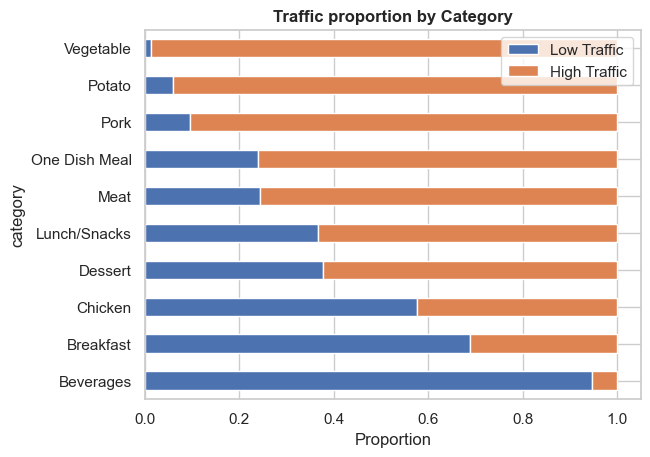

In [35]:
# Group the DataFrame "df" by "category" and "high_traffic", calculate proportions of each "high_traffic" category in each "category".
proportions_by_category = df.groupby("category")["high_traffic"].value_counts(normalize=True, sort=False)

# Unstack the Series to create a pivot table showing proportions of "high_traffic" for each category.
props = proportions_by_category.unstack()

# Create a stacked bar plot to visualize the proportion of high and low traffic in each category.
props.plot(kind="barh", stacked=True)

# Customize the plot.
plt.legend(['Low Traffic', 'High Traffic'])
plt.xlabel("Proportion")
plt.title("Traffic proportion by Category", fontweight="bold")

# Display the plot.
plt.show()

During the exploration of recipe categories, it was evident that the proportions of high and low traffic recipes varied significantly among different categories. To establish if there was a meaningful correlation between traffic and the different recipe categories, a comprehensive statistical analysis was performed.

For this analysis, a proportion test was conducted individually on each recipe category, comparing their traffic proportions to the overall sample proportion. The formulated hypotheses were as follows:

- **Null Hypothesis (H0)**: The proportion of high traffic recipes for a category "X" is equal to the overall sample proportion.
- **Alternative Hypothesis (Ha)**: The proportion of high traffic recipes for a category "X" is either larger or smaller than the overall sample proportion.

Both left-tailed and right-tailed tests were executed for each category to determine whether the category had a significantly higher or lower traffic proportion compared to the sample.

The results of the statistical analysis unveiled intriguing insights into the relationship between recipe categories and traffic proportions. Specifically:

   - In the following categories - `Meat`, `One Dish Meal`, `Pork`, `Potato`, and `Vegetable` - the proportion of high traffic recipes was found to be significantly higher than the sample mean. This suggests that recipes falling under these categories attract more attention and engagement from users.

   - Conversely, in the categories of `Beverages`, `Breakfast` and `Chicken`, the proportion of high traffic recipes was significantly lower than the sample mean. This implies that recipes in these categories might have a lower level of user interest and engagement compared to the overall sample.

In [36]:
# Set the significance level and calculate the sample proportion for high traffic
p_0 = df["high_traffic"].value_counts(normalize=True)[1]
alpha = 0.05

# Reset the index of the previously created pivot table to ease the extraction of data for the analysis
proportions_by_category = proportions_by_category.reset_index(name="percentage")

# Extract the relevant columns "category" and "percentage" from "high_proportion" and reset the index while dropping the old index. Rename "percentage" to "p_hat" for clarity
calculator_table = proportions_by_category[proportions_by_category["high_traffic"] == 1][["category", "percentage"]].reset_index(drop=True)
calculator_table = calculator_table.rename(columns={'percentage': 'p_hat'})

# Add a new column "n" to "calculator_table" containing the count of recipes with high traffic for each category from "category_count".
category_count = df.groupby("category")["high_traffic"].count()
calculator_table["n"] = category_count.reset_index()["high_traffic"]

# Calculate the numerator and denominator of the test statistic
calculator_table["numerator"] = calculator_table["p_hat"] - p_0
calculator_table["denominator"] = np.sqrt(p_0 * (1 - p_0) / calculator_table["n"])
calculator_table["zscore"] = calculator_table["numerator"] / calculator_table["denominator"]

# Calculate p-value for left and right tail test using the z-scores
from scipy.stats import norm
calculator_table["pvalue_lefttail"] = norm.cdf(calculator_table["zscore"])
calculator_table["pvalue_righttail"] = 1 - norm.cdf(calculator_table["zscore"])

# Check the layout of the created table "calculator_table"
display(calculator_table)

# Print the statistical conclusion comparing the p-values against the significance level
for i in range(10):
    if calculator_table.iloc[i, 6] < alpha:
        print("Traffic is significantly lower when the category is " + calculator_table.iloc[i,0])
    elif calculator_table.iloc[i, 7] < alpha:
        print("Traffic is significantly higher when the category is " + calculator_table.iloc[i,0])
    else:
        print("Traffic is not significantly affected when the category is " + calculator_table.iloc[i,0])


,category,p_hat,n,numerator,denominator,zscore,pvalue_lefttail,pvalue_righttail
0,Beverages,0.054348,92,-0.543418,0.051122,-10.629735,1.083631e-26,1.000000e+00
1,Breakfast,0.311321,106,-0.286445,0.047627,-6.014347,9.030665e-10,1.000000e+00
2,Chicken,0.423313,163,-0.174452,0.038407,-4.542196,2.783566e-06,9.999972e-01
3,Dessert,0.623377,77,0.025611,0.055880,0.458323,6.766396e-01,3.233604e-01
4,Lunch/Snacks,0.634146,82,0.036381,0.054150,0.671856,7.491623e-01,2.508377e-01
5,Meat,0.756757,74,0.158991,0.057002,2.789230,9.973583e-01,2.641674e-03
6,One Dish Meal,0.761194,67,0.163429,0.059906,2.728102,9.968150e-01,3.185000e-03
7,Pork,0.904110,73,0.306344,0.057391,5.337846,1.000000e+00,4.702870e-08
8,Potato,0.939759,83,0.341994,0.053823,6.354070,1.000000e+00,1.048455e-10
9,Vegetable,0.987179,78,0.389414,0.055521,7.013808,1.000000e+00,1.159628e-12


Traffic is significantly lower when the category is Beverages
Traffic is significantly lower when the category is Breakfast
Traffic is significantly lower when the category is Chicken
Traffic is not significantly affected when the category is Dessert
Traffic is not significantly affected when the category is Lunch/Snacks
Traffic is significantly higher when the category is Meat
Traffic is significantly higher when the category is One Dish Meal
Traffic is significantly higher when the category is Pork
Traffic is significantly higher when the category is Potato
Traffic is significantly higher when the category is Vegetable


# Model development

Since the target feature for the model is a binary variable, we require **predictive models suited for binary classification**. 

The email received from the Head of Data Science specified that "They [Project team] want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes." It was decided that the best suited metrics to asses the performance of the models were:
- **Precision**: the proportion of true positive predictions (correctly predicted high traffic recipes) out of all the predicted positive instances (recipes predicted as high traffic). So, if the team's desired precision is 80%, it means that 80% of the recipes  predicted as high traffic shall actually be high traffic. 
- **False Positive Rate**: False Positive Rate (FPR) is the ratio of the number of false positives (recipes uncorrectly predicted as high traffic) to the total number of actual negatives (actual low traffic recipes + false positives). In order to minimize the chance of showing unpopular recipes, it is necessary to aim for a low FPR.

In order to make the data suitable for predictive models, the data was divided in features and target variables. Within the feature variables, categorical values were one-hot-encoded and numerical values were scaled. Features and target were then split into training data for the model and test data to assess the performance of the models. 

## Baseline model
One common and straightforward baseline model for binary classification is the **Majority Class Classifier**. In the majority class classifier, the model predicts the most frequent class in the training data for all instances in the test set. When applying the MCC to the data, the precision obtained was of 0.5985 and the FPR was of 1.0000.

In [37]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Create dummy variables for categorical features, drop the first category to avoide multicollinearity
df = pd.get_dummies(df, drop_first=True)

# Separate the feature variables and the target variable
X = df.drop("high_traffic", axis=1)
y = df["high_traffic"]

# Use the MinMaxScaler to scale the numerical features (nutritional_values) 
X.loc[:, nutritional_values] = scaler.fit_transform(X.loc[:, nutritional_values])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

# Determine the majority class in the training data
majority_class = y_train.value_counts(sort=True).index[0]
    
# Predict the majority class for all instances in the test set
y_pred = [majority_class] * len(y_test)
    
# Calculate precision
precision = precision_score(y_test, y_pred)
    
# Calculate confusion matrix to get true negatives, false positives, false negatives, and true positives
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
# Calculate false positive rate (FPR)
false_positive_rate = fp / (fp + tn)

# Print out precision and FPR
print(f"MCC Precision: {precision:.4f}")
print(f"MCC False Positive Rate: {false_positive_rate:.4f}")
display(X.head())

MCC Precision: 0.5985
MCC False Positive Rate: 1.0000


,calories,carbohydrate,sugar,protein,servings,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,0.009727,0.072645,0.004370,0.002532,4,0,0,0,0,0,0,0,1,0
1,0.251620,0.080413,0.020707,0.007926,1,1,0,0,0,0,0,0,0,0
2,0.026669,0.057561,0.259648,0.000055,4,0,0,0,0,0,0,0,0,0
3,0.007407,0.003431,0.005311,0.001459,4,0,0,0,0,0,0,0,0,0
4,0.190203,0.006467,0.011026,0.148420,2,0,0,0,0,0,1,0,0,0


## Comparison Model
Since the target feature for the model is a binary variable, we require predictive models suited for binary classification. To obtain an initial estimate of suitable classification models, we measured the precision of three commonly used classification models: Logistic Regression, KNeighborsClassifier, and DecisionTreeClassifier. These models were evaluated with cross validation and without any prior fine-tuning.

Among the tested models, **Logistic Regression and KNeighborsClassifier demonstrated the highest precision scores**, with similar values. As a result, it was decided to proceed fine-tuning these two models. 

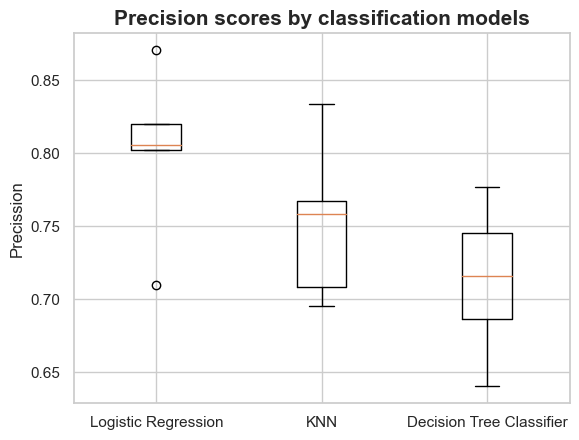

In [38]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np


# Create models dictionary and a list to append the scoring results
precision_results = []
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
          "Decision Tree Classifier": DecisionTreeClassifier()}

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=5, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X, y, cv=kf, scoring='precision')
  precision_results.append(cv_results)

# Plot the cross validation scores of the three tested models
plt.boxplot(precision_results, labels=models.keys())
plt.ylabel("Precission")
plt.title('Precision scores by classification models', 
          fontsize=15,
          fontweight='bold')
plt.show()

### Logistic Regression
In this analysis, a Logistic Regression model was optimized using hyperparameter tuning through GridSearchCV. The main objective was to enhance the model's predictive performance for the classification task. In this case, two hyperparameters were considered: 'C' (regularization strength) and 'penalty' (regularization type). Cross-validation was performed to ensure robustness in assessing each hyperparameter combination's performance.

The results of the hyperparameter tuning process indicated that the best combination was 'C': 1 with 'penalty': 'l2'. The tuned Logistic Regression model achieved a precision score of 0.7751 and a FPR of 0.3518 on the validation data. The model's default configuration (untuned) achieved the exact same precision score and FPR. This can be explained by the fact that the best combination of tested hyperparameters happen to match the default setting of the logistic regression function, and thus the tuned and untuned model are actually the same model. 

However, it's important to emphasize that this regression model exhibits a noteworthy advancement over the baseline model both in precision score and FPR.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Create the parameter space
params = {"penalty": ["l1", "l2", "elasticnet", None], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Instantiate the GridSearchCV object
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, params, cv=kf)

# Fit the data to the tuned and untuned model
logreg_cv.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_tuned = logreg_cv.predict(X_test)
y_pred_untuned = logreg.predict(X_test)

# Calculate precision scores for both models
precision_tuned = precision_score(y_test, y_pred_tuned)
precision_untuned = precision_score(y_test, y_pred_untuned)

# Calculate confusion matrix and FPR of the tuned model
tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_test, y_pred_tuned).ravel()
false_positive_rate_tuned = fp_t / (fp_t + tn_t)

# Calculate confusion matrix and FPR of the untuned model
tn_u, fp_u, fn_u, tp_u = confusion_matrix(y_test, y_pred_untuned).ravel()
false_positive_rate_untuned = fp_u / (fp_u + tn_u)

# Print the tuned parameters, precision, and FPR
print("Tuned Logistic Regression Best Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Precision: {}".format(precision_tuned))
print("Tuned Logistic Regression False Positive Rate: {}".format(false_positive_rate_tuned))
print("Untuned Logistic Regression Precision: {}".format(precision_untuned))
print("Untuned Logistic Regression False Positive Rate: {}".format(false_positive_rate_untuned))

Tuned Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2'}
Tuned Logistic Regression Precision: 0.7751479289940828
Tuned Logistic Regression False Positive Rate: 0.35185185185185186
Untuned Logistic Regression Precision: 0.7751479289940828
Untuned Logistic Regression False Positive Rate: 0.35185185185185186


### K-Nearest Neighbors
The performance of the K-Nearest Neighbors (KNN) classification model was explored for different values of the n_neighbors hyperparameter, which specifies the number of neighboring data points the model considers for predictions, and for the metrics argument, which specifies the type of metric to use for distance computation. It was evaluated on the test data using n_neighbors values from 1 to 20 and three different metrics.

By plotting a scatter plot with n_neighbors on the x-axis and precision scores on the y-axis, it was observed that **setting n_neighbors to 6** resulted in the highest precision scores. From the plot it was not clear which of the three tested metrics yielded the best results.

The three metrics combined with a model of 6 n_neighbots will be further explored for their FPR and compared to the untuned KNN model.

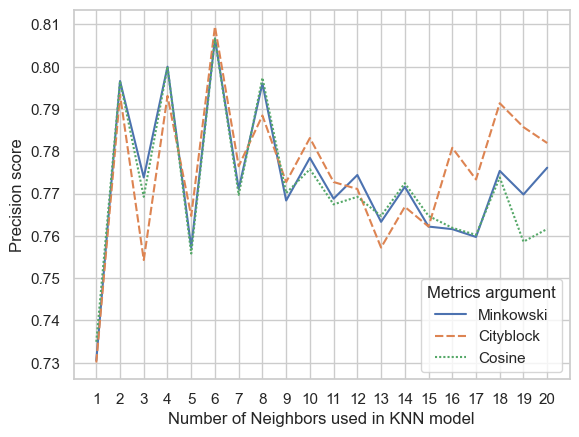

In [40]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Define a range of values for the 'n_neighbors' hyperparameter in the KNN model
n = range(1, 21, 1)

# Initialize an empty list to store the accuracy scores for different 'n_neighbors' values
metrics = ["minkowski", "cityblock", "cosine"]
minkowski_scores = []
cityblock_scores = []
cosine_scores = []

# Loop through the 'n' values
for i in n:
    for metric in metrics:
              
        # Create a KNeighborsClassifier model with the current 'n_neighbors' value and using 'kd_tree' algorithm
        knn = KNeighborsClassifier(n_neighbors=i, metric=metric)

        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        
        # Add the scores to the corresponding list depending on the metric
        if metric == "minkowski":
            minkowski_scores.append(precision_score(y_test, y_pred_knn))        
        elif metric == "cityblock":
            cityblock_scores.append(precision_score(y_test, y_pred_knn))       
        elif metric == "cosine":
            cosine_scores.append(precision_score(y_test, y_pred_knn))

# Create a DataFrame to be plotted. Change the index of the dataframe to match the n_neighbors explored            
df_scores = pd.DataFrame({"Minkowski": minkowski_scores, "Cityblock": cityblock_scores, "Cosine": cosine_scores})
df_scores.index = n

# Plot the relationship between 'n_neighbors' and accuracy scores
sns.lineplot(df_scores)
plt.xticks(n)
plt.xlabel("Number of Neighbors used in KNN model")
plt.ylabel("Precision score")
plt.legend(title="Metrics argument")
plt.show()

After conducting a comprehensive evaluation with the modified parameters, we have obtained the subsequent outcomes:

- For n_neighbors = 6 and metric = minkowski: Precision 0.8067 / FPR 0.2685
- For n_neighbors = 6 and metric = cityblock: Precision 0.8095 / FPR 0.2593
- For n_neighbors = 6 and metric = cosine: Precision 0.8067 / FPR 0.2685
- Default KNN model: Precision 0.7572 / FPR 0.3889

In light of the adjusted parameters and their corresponding model outcomes, a prominent standout emerges, solidifying its position as the most exceptional configuration: **n_neighbors = 6 and metric = cityblock**. The precision score of 0.8095 attests to its capability to accurately identify positive instances, while the impressively low False Positive Rate of 0.2593 underscores its proficiency in minimizing the misclassification of negative cases.

There is a substantial enhancement achieved by the optimization of our model in contrast with the default KNN model, which yields a precision of 0.7572 and a False Positive Rate of 0.3889. This substantial enhancement achieved by our optimized model speaks volumes about the value of parameter refinement. Comparing the performance of this optimized model to the MCC baseline model (Precision 0.5985 / FPR 1.0000) further underscores its effectiveness.

In [41]:
# Loop through the 'n' values
for metric in metrics:              
    # Create a KNeighborsClassifier model with the current 'n_neighbors' value and metric
    knn = KNeighborsClassifier(n_neighbors=6, metric=metric)

    # Fit the classifier to the training data and get the precision score
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    ps = precision_score(y_test, y_pred_knn)
        
    # Calculate confusion matrix and FPR of the model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
    FPR = fp / (fp + tn)
    # Print out the precision and FPR for each model
    print("For 6 n_neighbors and metric " + metric + ": Precision " +str(ps) + " / FPR " + str(FPR))
        
# Create a KNeighborsClassifier model with default settings
knn = KNeighborsClassifier()

# Fit the deffault model to the training data and get the precision score
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
ps = precision_score(y_test, y_pred_knn)

# Calculate confusion matrix and FPR of the model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
FPR = fp / (fp + tn)

# Print out the precision and FPR of the default model
print("Default KNN model: Precision " +str(ps) + " / FPR " + str(FPR))

For 6 n_neighbors and metric minkowski: Precision 0.8066666666666666 / FPR 0.26851851851851855
For 6 n_neighbors and metric cityblock: Precision 0.8095238095238095 / FPR 0.25925925925925924
For 6 n_neighbors and metric cosine: Precision 0.8066666666666666 / FPR 0.26851851851851855
Default KNN model: Precision 0.7572254335260116 / FPR 0.3888888888888889


## Conclusion of Model Development and Evaluation

In conclusion, the process of developing predictive models for binary classification, focused on identifying popular recipes while minimizing the display of unpopular ones, yielded promising outcomes. The evaluation of the models was guided by precision and False Positive Rate (FPR), in alignment with the project's defined objectives. The exploration began by establishing a baseline through the application of a Majority Class Classifier. Subsequent efforts delved into more advanced approaches, specifically centered around Logistic Regression and K-Nearest Neighbors (KNN), incorporating hyperparameter tuning to optimize their performance.

Both comparison models clearly outperformed the baseline model and its precision of 0.5985 and FPR of 1.000. The Logistic Regression model, characterized by a regularization strength ('C') of 1 and a 'penalty' of 'l2', demonstrated enhancement over the Majority Class Classifier counterpart, showcasing a precision score of 0.7751 and a FPR of 0.3518. Nevertheless, the best model was achieved through a KNN model. Setting its configurations with 'n_neighbors' set to 6 and metrics to cityblock unveiled the most favorable results, achieving a precision of 0.8095 and an FPR of 0.2593. 

# Business metrics

In this project, two key business metrics were employed for the development and performance assessment of predictive models: precision and false positive rate (FPR). These metrics were chosen to align with the company's objectives of accurately predicting high-traffic recipes (high precision) while minimizing the display of low-traffic recipes (low FPR). 

Based on our metrics, both comparison models significantly outperformed the baseline model, which showed a poor performance with a precision of 0.5985 and a FPR of 1.000. The Logistic Regression model, showcased enhanced performance compared to the Majority Class Classifier, with a precision score of 0.7751 and an FPR of 0.3518. However, the best results were achieved by the KNN model. This particular KNN variant demonstrated  a precision of 0.8095 and a low FPR of 0.2593. This accomplishment aligns seamlessly with the company's objective of achieving an 80% precision rate while simultaneously minimizing the exposure of unpopular recipes through a low false positive rate.

# Summary and recommendations

During our exploratory analysis it was determined that recipes missing nutritional values have a significantly higher traffic than recipes that include their nutritional values. Thus, omitting nutritional values from displayed recipes might serve as a catalyst for increasing website engagement.

Furthermore, our exploration reveiled a significant correlation between distinct recipe categories and website traffic dynamics. In light of these findings, we propose the following approach: spotlighting recipes with categories such as Meat, One Dish Meal, Pork, Potato, and Vegetable. These categories, statistically validated as traffic boosters, will most likely elevate the website's performance. On the other hand, categories like Beverages, Breakfast, and Chicken, found to be statistically linked to reduced traffic, should be avoided.

Additionally, we developed a K-Nearest neighbor model that achieves a precision of 80% while yielding a low false positive rate. This balance reduces the risk of recommending recipes unlikely to generate high traffic.  Our recommendation is to use this model in order to decide which recipes will be displayed on the website. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation